In [94]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [60]:
anime = pd.read_csv('anime_cleaned.csv')
users = pd.read_csv('users_cleaned.csv')

# Animelists

In [19]:
animelists = pd.read_csv('animelists_cleaned.csv')

In [37]:
animelists = animelists.sort_values(by='username')

In [22]:
# drop null values in username
animelists = animelists.dropna(subset=['username'])

In [24]:
# drop columns my_start_date and my_finish_date
animelists = animelists.drop(columns=['my_start_date', 'my_finish_date'])

In [26]:
# drop my_tags column because it is not needed
animelists = animelists.drop(columns=['my_tags'])

In [36]:
# drop column my_last_updated because it is not needed
animelists = animelists.drop(columns=['my_last_updated'])

In [38]:
animelists

,username,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep
6740075,----phoebelyn,949,6,0,2,0.0,0
6739996,----phoebelyn,120,0,0,6,0.0,0
6739998,----phoebelyn,957,39,0,2,0.0,0
6739999,----phoebelyn,1571,0,0,3,0.0,0
6740000,----phoebelyn,1579,0,10,3,0.0,0
...,...,...,...,...,...,...,...
6085370,zzzzz-chan,23421,0,0,6,0.0,0
6085243,zzzzz-chan,532,38,8,2,0.0,0
6085153,zzzzz-chan,21105,10,7,2,NaN,0
6085401,zzzzz-chan,32983,0,0,6,0.0,0


In [74]:
animelists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31283787 entries, 6740075 to 6085158
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   username             object 
 1   anime_id             int64  
 2   my_watched_episodes  int64  
 3   my_score             int64  
 4   my_status            int64  
 5   my_rewatching        float64
 6   my_rewatching_ep     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.9+ GB


In [73]:
animelists.describe()

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep
count,3.128379e+07,3.128379e+07,3.128379e+07,3.128379e+07,2.440557e+07,3.128379e+07
mean,1.170324e+04,1.289617e+01,4.652314e+00,3.008110e+00,7.903113e-04,1.833008e-01
std,1.134843e+04,3.733389e+01,3.931616e+00,1.730421e+00,2.810137e-02,1.009176e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.601000e+03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,8.086000e+03,4.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
75%,1.977500e+04,1.300000e+01,8.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
max,3.789600e+04,9.999000e+03,1.000000e+01,5.500000e+01,1.000000e+00,5.644513e+06


# Anime

In [61]:
anime = anime.drop(columns=[
    'image_url', 'background', 'related', 'premiered', 'broadcast',
    'opening_theme', 'ending_theme', 'title_english', 'title_japanese', 'title_synonyms',
    'airing', 'aired_string', 'licensor', 'producer'
    ])

In [62]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6668 non-null   int64  
 1   title            6668 non-null   object 
 2   type             6668 non-null   object 
 3   source           6668 non-null   object 
 4   episodes         6668 non-null   int64  
 5   status           6668 non-null   object 
 6   aired            6668 non-null   object 
 7   duration         6668 non-null   object 
 8   rating           6668 non-null   object 
 9   score            6668 non-null   float64
 10  scored_by        6668 non-null   int64  
 11  rank             6312 non-null   float64
 12  popularity       6668 non-null   int64  
 13  members          6668 non-null   int64  
 14  favorites        6668 non-null   int64  
 15  studio           6668 non-null   object 
 16  genre            6664 non-null   object 
 17  duration_min  

In [72]:
anime.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
count,6668.000000,6668.000000,6668.000000,6.668000e+03,6312.000000,6668.000000,6.668000e+03,6668.000000,6668.000000,6668.000000
mean,15064.977804,14.276395,6.848998,2.403501e+04,4327.645120,4479.515897,4.749037e+04,670.365627,28.442167,2006.915267
std,13161.364001,40.906929,0.927448,6.112103e+04,3170.699074,3453.338080,1.051211e+05,3823.072834,25.365980,10.381425
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.800000e+01,0.000000,0.000000,1942.000000
25%,2592.000000,1.000000,6.350000,6.812500e+02,1710.750000,1691.750000,2.222750e+03,3.000000,17.000000,2003.000000
50%,10401.500000,6.000000,6.930000,3.966000e+03,3754.500000,3629.500000,1.033650e+04,21.000000,24.000000,2010.000000
75%,30301.250000,13.000000,7.460000,1.976075e+04,6338.500000,6630.250000,4.336000e+04,142.000000,27.000000,2015.000000
max,37896.000000,1818.000000,9.520000,1.009477e+06,12856.000000,14468.000000,1.456378e+06,106895.000000,163.000000,2018.000000


# Users

In [65]:
users = users.drop(columns=["location", "access_rank"])

In [68]:
# generate new column age based on birth_date
users['age'] = 2018 - users['birth_date'].str[:4].astype(int)

In [70]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   username                  108710 non-null  object 
 1   user_id                   108711 non-null  int64  
 2   user_watching             108711 non-null  int64  
 3   user_completed            108711 non-null  int64  
 4   user_onhold               108711 non-null  int64  
 5   user_dropped              108711 non-null  int64  
 6   user_plantowatch          108711 non-null  int64  
 7   user_days_spent_watching  108711 non-null  float64
 8   gender                    108711 non-null  object 
 9   birth_date                108711 non-null  object 
 10  join_date                 108711 non-null  object 
 11  last_online               108711 non-null  object 
 12  stats_mean_score          108711 non-null  float64
 13  stats_rewatched           108711 non-null  f

In [71]:
users.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,stats_mean_score,stats_rewatched,stats_episodes,age
count,1.087110e+05,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000
mean,1.817687e+06,14.767503,196.458178,11.388167,11.733716,75.578589,61.913873,7.747612,14.197993,3779.871255,25.125820
std,1.998269e+06,32.746591,244.945751,30.830825,30.978991,178.653664,59.211762,1.451368,55.376799,3678.336729,4.632399
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.500694,0.000000,0.000000,7.000000,10.000000
25%,1.994345e+05,3.000000,50.000000,0.000000,0.000000,6.000000,21.066319,7.330000,0.000000,1269.500000,22.000000
50%,5.675030e+05,7.000000,123.000000,4.000000,3.000000,27.000000,46.190278,7.890000,1.000000,2797.000000,25.000000
75%,3.477036e+06,16.000000,254.000000,12.000000,12.000000,81.000000,84.461806,8.460000,10.000000,5135.000000,28.000000
max,7.251737e+06,2934.000000,5479.000000,2562.000000,2457.000000,12051.000000,952.654595,10.000000,9404.000000,62347.000000,49.000000


# Análisis más profundo

In [96]:
# proyecta las columnas username y anime_id
animelists2 = animelists[['username', 'anime_id', 'my_watched_episodes']]

In [97]:
anime_h = anime[anime['genre'] == 'Hentai']

In [98]:
animelists2 = animelists2.merge(anime_h, on='anime_id', how='inner')

In [99]:
animelists2 = animelists2.merge(users, on='username', how='inner')

In [101]:
# filter animelists2 by my_watched_episodes > 0
animelists2 = animelists2[animelists2['my_watched_episodes'] > 0]

<AxesSubplot:>

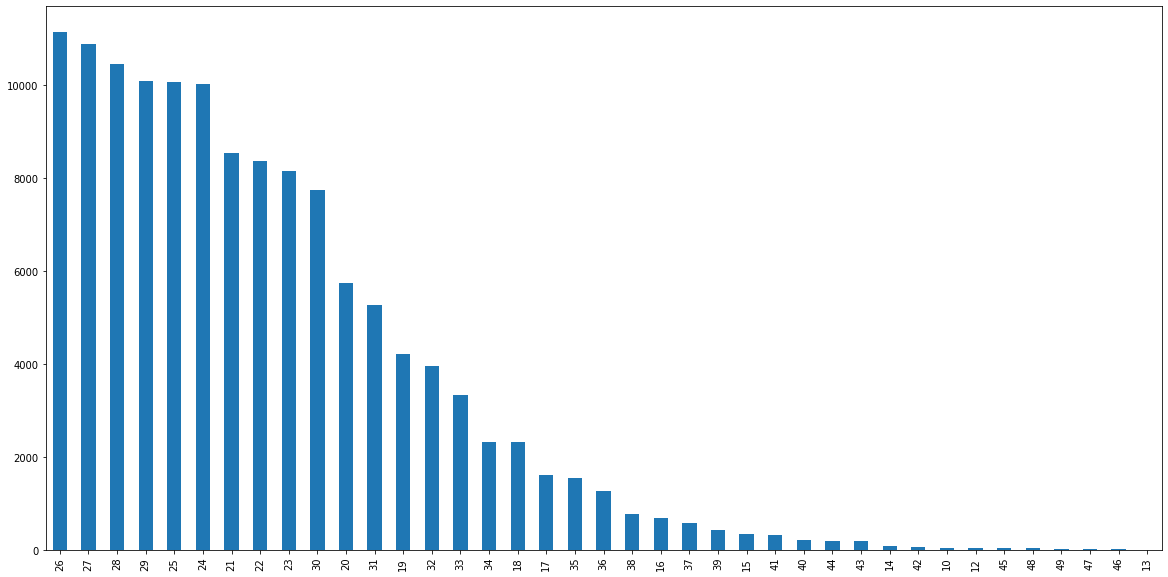

In [105]:
# graph of users by age
animelists2['age'].value_counts().plot(kind='bar', figsize=(20, 10))